<a href="https://colab.research.google.com/github/jomariy241/assignment/blob/main/Supervised_Learning_Assignment_salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data=pd.read_csv('/content/Salary_dataset.csv')

In [22]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [24]:
data.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


In [25]:
data.isnull().sum()

,0
Unnamed: 0,0
YearsExperience,0
Salary,0


In [26]:
data.dtypes

,0
Unnamed: 0,int64
YearsExperience,float64
Salary,float64


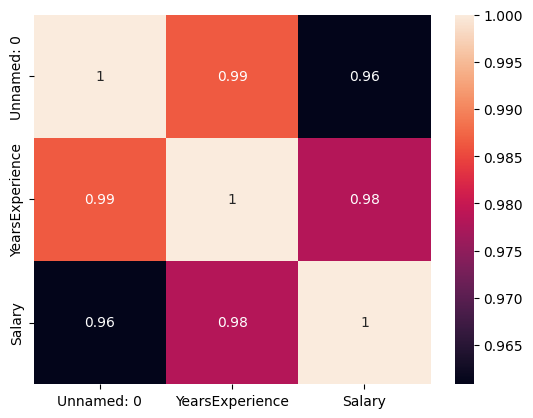

In [27]:
#Visualization
sns.heatmap(data.corr(),annot=True)
plt.show()

In [28]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [29]:
y=data.Salary
x=data.drop('Salary',axis=1)

In [30]:
#splittind data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
#linear regression Model Fitting
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [35]:
model=lr.fit(x_train,y_train)

In [36]:
#Prediction
y_pred=model.predict(x_test)

In [37]:
y_pred

array([ 40749.96184072, 122700.62295594,  64962.65717022,  63100.14214487,
       115250.56285456, 107800.50275317])

In [38]:
#Evaluation
from sklearn import metrics

In [48]:
print(metrics.mean_absolute_error(y_test,y_pred))


2446.17236904651


In [47]:
print(metrics.mean_squared_error(y_test,y_pred))


12823412.298126565


In [46]:
print(metrics.r2_score(y_test,y_pred))


0.988169515729126


In [50]:
error= y_test-y_pred
error

,Salary
2,-3017.961841
28,-308.622956
13,-7880.657170
10,118.857855
26,1719.437145
24,1631.497247


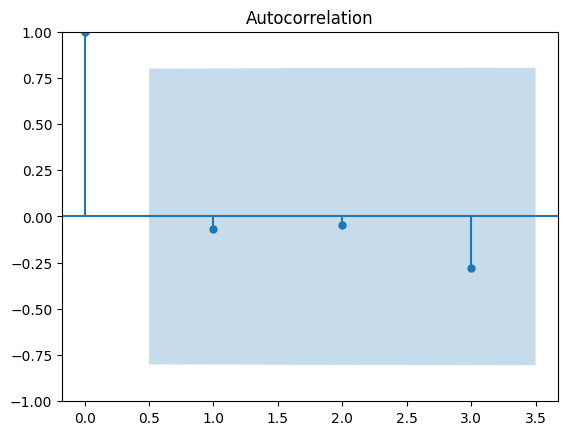

In [52]:
#No Autocorrelation
import statsmodels.api as smt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf=plot_acf(error)
plt.show()

<ipython-input-53-a4715c6504c5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(error)


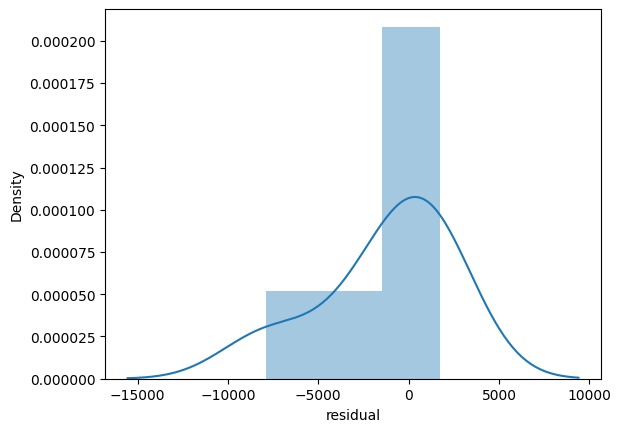

In [53]:
sns.distplot(error)
plt.xlabel('residual')
plt.show()

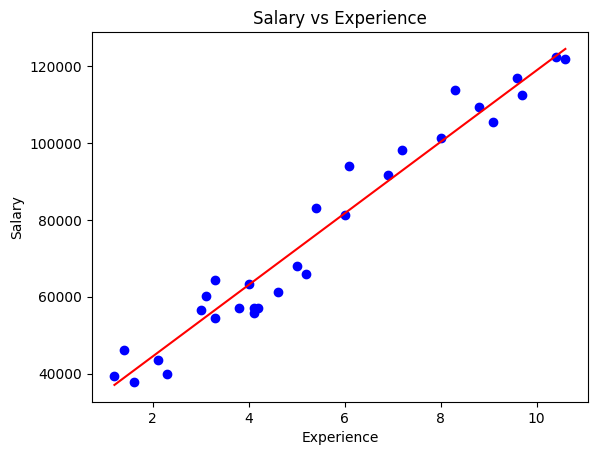

In [57]:
plt.scatter(x,y,color='blue')
plt.plot(x,model.predict(x),color='red')
plt.title('Salary vs yearsExperience')
plt.xlabel('yearsExperience')
plt.ylabel('Salary')
plt.show()

In [58]:
#Polynomial Regression model fitting
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=3)
x_poly=poly.fit_transform(x)

In [59]:
print(x_poly)

[[1.000000e+00 1.200000e+00 1.440000e+00 1.728000e+00]
 [1.000000e+00 1.400000e+00 1.960000e+00 2.744000e+00]
 [1.000000e+00 1.600000e+00 2.560000e+00 4.096000e+00]
 [1.000000e+00 2.100000e+00 4.410000e+00 9.261000e+00]
 [1.000000e+00 2.300000e+00 5.290000e+00 1.216700e+01]
 [1.000000e+00 3.000000e+00 9.000000e+00 2.700000e+01]
 [1.000000e+00 3.100000e+00 9.610000e+00 2.979100e+01]
 [1.000000e+00 3.300000e+00 1.089000e+01 3.593700e+01]
 [1.000000e+00 3.300000e+00 1.089000e+01 3.593700e+01]
 [1.000000e+00 3.800000e+00 1.444000e+01 5.487200e+01]
 [1.000000e+00 4.000000e+00 1.600000e+01 6.400000e+01]
 [1.000000e+00 4.100000e+00 1.681000e+01 6.892100e+01]
 [1.000000e+00 4.100000e+00 1.681000e+01 6.892100e+01]
 [1.000000e+00 4.200000e+00 1.764000e+01 7.408800e+01]
 [1.000000e+00 4.600000e+00 2.116000e+01 9.733600e+01]
 [1.000000e+00 5.000000e+00 2.500000e+01 1.250000e+02]
 [1.000000e+00 5.200000e+00 2.704000e+01 1.406080e+02]
 [1.000000e+00 5.400000e+00 2.916000e+01 1.574640e+02]
 [1.000000

In [60]:
x_poly.shape

(30, 4)

In [82]:
xp_train, xp_test, yp_train, yp_test = train_test_split(x_poly,y,random_state =0)

In [83]:
regpoly = LinearRegression()

In [84]:
regpoly.fit(xp_train, yp_train)

LinearRegression()

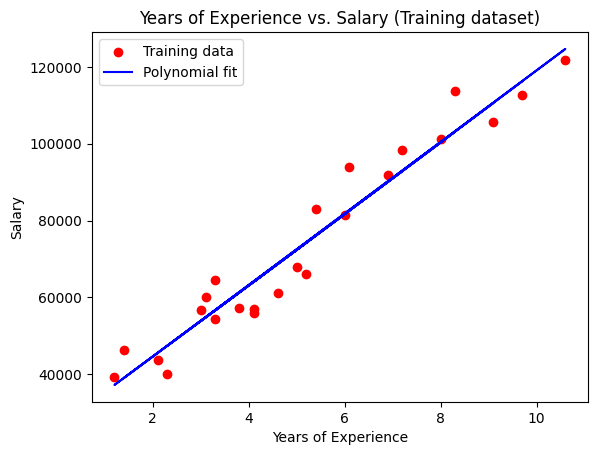

In [92]:
poly = PolynomialFeatures(degree=2)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Fit the linear regression model to the polynomial features
model = LinearRegression()
model.fit(x_train_poly, y_train)
y_train_pred = model.predict(x_train_poly)
plt.scatter(x_train, y_train, color='red', label='Training data')
plt.plot(x_train, y_train_pred, color='blue', label='Polynomial fit')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Years of Experience vs. Salary (Training dataset)')
plt.legend()
